# MNIST Exercise for Classification

## Imports

In [17]:
import os, sys
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')

In [3]:
len(mnist['data'])

70000

In [4]:
X = mnist['data']
y = mnist['target'].astype('float')

## Visualization

Number:  3.0


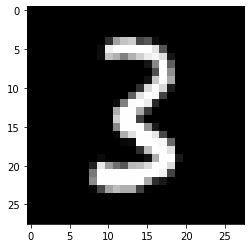

In [5]:
def viz(d,X,y): 
    print('Number: ',y[d])
    plt.imshow(X[d].reshape(28,28),cmap='gray')
    plt.show()
viz(50000,X,y)

## Preprocess data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### Convert to binary data

In [7]:
# Convert to 'zero' or 'non-zero'
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [8]:
# how many zeros
len(np.where(y_train_0 == True)[0]) , len(y_train_0)

(5560, 56000)

## SGD Classifier (Binary)

In [9]:
# 1.
from sklearn.linear_model import SGDClassifier
# 2.
sgd = SGDClassifier(random_state=1)
# 3.
# 4.
sgd.fit(X_train,y_train_0)
# 5.
y_pred_sgd = sgd.predict(X_test)

Classification: Is a zero?  False
Number:  8.0


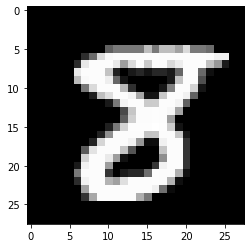

In [10]:
print('Classification: Is a zero? ',y_pred_sgd[0])
viz(0,X_test,y_test)

## Random Forest Classifier

In [11]:
# 1.
from sklearn.ensemble import RandomForestClassifier
# 2. 
rf = RandomForestClassifier(random_state=0, n_estimators=100)
# 3.
# 4.
rf.fit(X_train,y_train_0)
# 5.
y_pred_rf = rf.predict(X_test)

Classification: Is a zero?  False
Number:  2.0


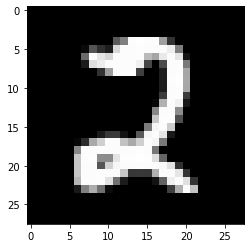

In [12]:
print('Classification: Is a zero? ',y_pred_rf[50])
viz(50,X_test,y_test)

## Performance Measures

### Cross-val score

In [13]:
from sklearn.model_selection import cross_val_score
cvs_sgd = cross_val_score(sgd,X_train,y_train_0, cv=4, scoring='accuracy')
print('For SGDClassifier the accuracies are: ',cvs_sgd)
cvs_rf = cross_val_score(rf,X_train,y_train_0, cv=4, scoring='accuracy')
print('For RandomForestClassifier the accuracies are: ',cvs_rf)

For SGDClassifier the accuracies are:  [0.98371429 0.98735714 0.98892857 0.98692857]
For RandomForestClassifier the accuracies are:  [0.99307143 0.99535714 0.99485714 0.99492857]


### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test_0, y_pred_rf),
             columns=pd.MultiIndex.from_product([['Prediction'], ["Negative", "Positive"]]),
             index=pd.MultiIndex.from_product([["Actual"], ["Negative", "Positive"]]))

Prediction         
                  Negative Positive
Actual Negative      12653        4
       Positive         71     1272

In [19]:
# Precision assigning positives (is the accuracy of positive predictions)
(1272)/(1272+4)

0.9968652037617555

In [20]:
# Recall classifying actual positives (sensitivity)
(1272)/(1272+71)

0.9471332836932241

In [40]:
# Specificity: TN / (TN + FP)
(12653)/(12653+4)

0.9996839693450265

### Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

### F1 Score

F1 is the harmonic mean of precision and recall. Favours classifiers that have similar precision and recall

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test_0,y_pred_rf)

0.9713631156930126

### Precision Recall curve

In [36]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd,X_test,y_test_0, cv=2, method='decision_function')

In [37]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test_0, y_scores)

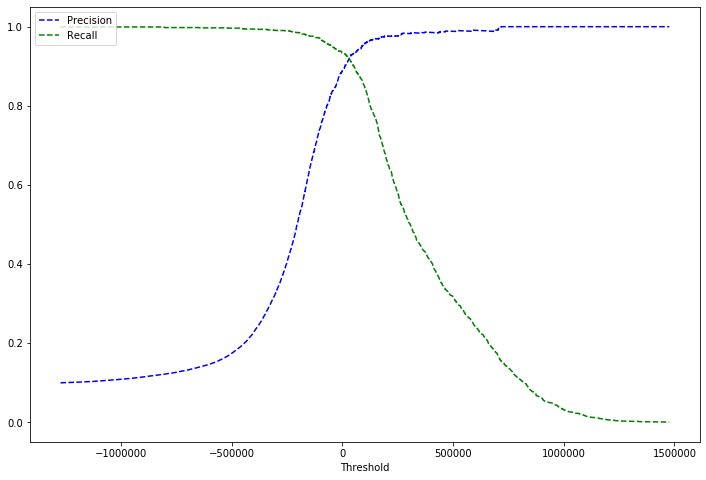

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
#     plt.ylim([-0.5,1.5])   
    
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

### ROC Curve

Plots sensitivity (recall) verus 1 - specificity (TrueNegativeRate)

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_0, y_scores)

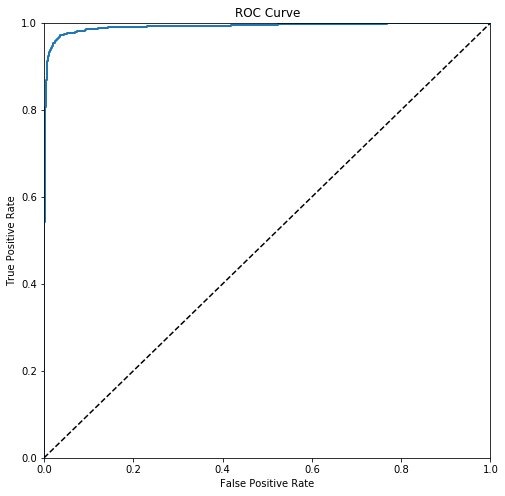

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
plt.figure(figsize=(8,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_0, y_scores)

0.9914075782998009

Use PR (Precision-Recall) curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives